In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [3]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [4]:
df = pd.read_csv('train.csv')
df["family"]=df["SibSp"]+df["Parch"]
df.Age.fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['PassengerId','SibSp','Parch'],inplace=True)
df.dropna(inplace=True)
df['cab']=np.array([cabin[0] for cabin in df['Cabin']])
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df = pd.get_dummies(df,columns=['Pclass', 'Sex', 'cab', 'Embarked'])

C:\Users\jynts\AppData\Local\Temp\ipykernel_27768\2478589216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df['Age'].mean(), inplace=True)
C:\Users\jynts\AppData\Local\Temp\ipykernel_27768\2478589216.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [5]:
x= df.drop(columns=['Survived'],axis=1)
y= df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =3)

In [6]:
dtree = DecisionTreeClassifier(criterion="entropy",random_state=43,max_depth=1)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)


print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[ 9  9]
 [ 2 21]]
0.7317073170731707
0.7
0.9130434782608695
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.70      0.91      0.79        23

    accuracy                           0.73        41
   macro avg       0.76      0.71      0.71        41
weighted avg       0.75      0.73      0.72        41



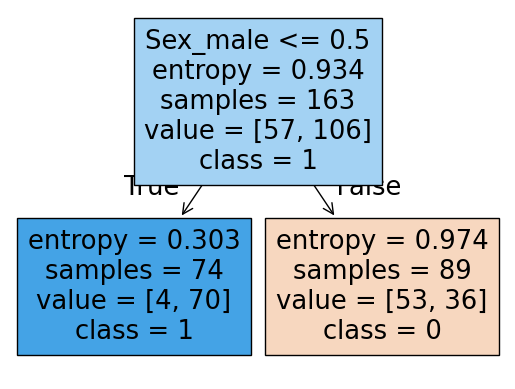

In [7]:
plot_tree(
    dtree,
    feature_names=np.array(x_train.columns),
    class_names=np.array(['0','1']),
    filled = True
)
plt.show()

In [37]:
x_train.shape

(163, 19)

In [46]:
y_train.shape

(163, 1)

In [30]:
y_train.columns

Index(['Survived'], dtype='object')

In [44]:
np.array(x_train.columns)

array(['Age', 'Fare', 'family', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'cab_A', 'cab_B', 'cab_C', 'cab_D',
       'cab_E', 'cab_F', 'cab_G', 'cab_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [48]:
np.array(['0','1'])

array(['0', '1'], dtype='<U1')